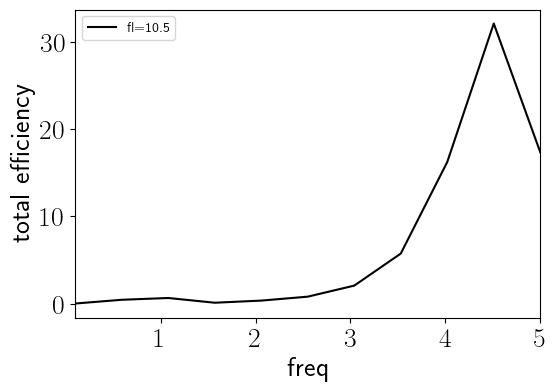

In [58]:
import csv
import os
import matplotlib
import matplotlib.pyplot as plt

px = 1/plt.rcParams['figure.dpi']  
plt.rcParams['text.usetex'] = True

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

plt.style.use('fast')

#use when converting db to percentage
convert_abs = True

#cut the graph of vswr above this value
clip_vswr_threshold = 0

#the parameter which was variated
variated_param = "fl"

#label on x axis
x_label = "freq"

#label on y axis
y_label = "total efficiency"

#save file name
filename = "total efficiency"

#source data file name with directory
data_file = "./multi/totef.txt"
    
with open(data_file, "r") as file:
    data = [x for x in file.readlines()]

    temp = []
    # get the offsets
    for entry in data[1:]:
        if "Parameters" not in entry:
            temp.append(entry)
        else:
            break
    offset = len(temp) + 1

    df = {}
    count = 1

    while data != []:
        lines = data[-1 * offset:]

        label = [x for x in lines[0][15:-2].split("; ") if x.split("=")[0] == variated_param]

        x_axis = []
        y_axis = []
        lines = lines[3:]

        # if convert_abs is False, leave the lines plot as it is
        if convert_abs == False:
            for line in lines:
                temp = line[:-1]
                x, y = temp.split("\t")
                x, y = float(x), float(y)

                x_axis.append(x)  
                y_axis.append(y)

        else:
            for line in lines:
                temp = line[:-1]
                x, y = temp.split("\t")
                x, y = float(x), float(y)

                x_axis.append(x)  
                y_axis.append(( pow(10, (y / 10)) * 100 ))

        # clip vswr value to a threshold
        if clip_vswr_threshold != 0:
            temp_1 = [x_axis[y_axis.index(y)] for y in y_axis if y <= clip_vswr_threshold]
            temp_2 = [y for y in y_axis if y <= clip_vswr_threshold]

            x_axis = temp_1[10:]
            y_axis = temp_2[10:]

        # get the required point y co-ordiante to be marked on the plot
        for freq in x_axis:
            
            if freq == required_frequency:
                point = y_axis[x_axis.index(freq)]
                break
            
            if freq > required_frequency:
                j = x_axis.index(freq)

                p1 = (x_axis[j - 0], y_axis[j - 0])
                p2 = (x_axis[j - 1], y_axis[j - 1])

                x1, y1 = p1[0], p1[1]
                x2, y2 = p2[0], p2[1]

                point = y1 + ( (required_frequency - x1) * (y2 - y1) ) / (x2 - x1)

                break

        df[count] = {"x" : x_axis, "y" : y_axis, "label" : label[0]}
        count += 1
        data = data[:-1 * offset]

    fig, ax = plt.subplots(figsize=(600*px, 400*px))
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)

    colors = [
        'blue', 'green', 'red', 'magenta', 'black',
        'gray', 'brown', 'orange', 'purple', 'lavender', 'maroon',
        'olive', 'teal', 'navy', 'coral', 'indigo', 'crimson'
    ]

    import random

    for key, val in df.items():
        ax.plot(val["x"], val["y"], color = random.choice(colors), label = val["label"])

    plt.legend()

    xmin, xmax = min(list(df.items())[0][1]["x"]), max(list(df.items())[0][1]["x"])
    plt.xlim(xmin, xmax)

    fig.savefig(f'./plots/{filename}.png', format='png', dpi=600, bbox_inches = "tight")
